In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# INSTALLING REQUIRED LIBRARIES
!pip install -U pyproj -q
!pip install -U utm -q
!pip install -U google-colab -q
!pip install -U tornado -q
!pip install geemap -q
!pip install wxee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.9/443.9 kB 28.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado==6.4.2, but you have tornado 6.5.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 kB 5.9 MB/s eta 0:00:00


In [3]:
!wget https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis/Dailies/surface_gauss/air.2m.gauss.2021.nc
!wget https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis/Dailies/surface_gauss/air.2m.gauss.2022.nc
!wget https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis/Dailies/surface_gauss/air.2m.gauss.2023.nc
!wget https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis/Dailies/surface_gauss/air.2m.gauss.2024.nc

--2025-09-15 10:34:47--  https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis/Dailies/surface_gauss/air.2m.gauss.2021.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.87
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11603364 (11M) [application/x-netcdf]
Saving to: ‘air.2m.gauss.2021.nc’

air.2m.gauss.2021.n 100%[===================>]  11.07M  6.04MB/s    in 1.8s    

2025-09-15 10:34:50 (6.04 MB/s) - ‘air.2m.gauss.2021.nc’ saved [11603364/11603364]

--2025-09-15 10:34:50--  https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis/Dailies/surface_gauss/air.2m.gauss.2022.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.87
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11577420 (11M) [application/x-netcdf]
Saving to: ‘air.2m.gauss.2

In [4]:
!ls

air.2m.gauss.2021.nc  air.2m.gauss.2023.nc  drive
air.2m.gauss.2022.nc  air.2m.gauss.2024.nc  sample_data


In [5]:
import xarray as xr
ds = xr.open_mfdataset('air.2m*.nc').sel(lat=slice(40+63,30-63)).sel(lon = slice(360-70-64.5,360-80+65))

In [6]:
!wget https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis/Dailies/surface_gauss/air.2m.gauss.2020.nc
!wget https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis/Dailies/surface_gauss/air.2m.gauss.2019.nc

--2025-09-15 10:35:05--  https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis/Dailies/surface_gauss/air.2m.gauss.2020.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.87
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11640259 (11M) [application/x-netcdf]
Saving to: ‘air.2m.gauss.2020.nc’

air.2m.gauss.2020.n 100%[===================>]  11.10M  4.98MB/s    in 2.2s    

2025-09-15 10:35:08 (4.98 MB/s) - ‘air.2m.gauss.2020.nc’ saved [11640259/11640259]

--2025-09-15 10:35:09--  https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis/Dailies/surface_gauss/air.2m.gauss.2019.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.87
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11581917 (11M) [application/x-netcdf]
Saving to: ‘air.2m.gauss.2

In [7]:
ds_valid = xr.open_dataset('air.2m.gauss.2020.nc').sel(lat=slice(40+63,30-63)).sel(lon = slice(360-70-64.5,360-80+65))
ds_test = xr.open_dataset('air.2m.gauss.2019.nc').sel(lat=slice(40+63,30-63)).sel(lon = slice(360-70-64.5,360-80+65))

In [8]:
ds_test

<xarray.Dataset> Size: 6MB
Dimensions:    (time: 365, lat: 64, lon: 64, nbnds: 2)
Coordinates:
  * lat        (lat) float32 256B 88.54 86.65 84.75 ... -27.62 -29.52 -31.43
  * lon        (lon) float32 256B 226.9 228.8 230.6 232.5 ... 341.2 343.1 345.0
  * time       (time) datetime64[ns] 3kB 2019-01-01 2019-01-02 ... 2019-12-31
Dimensions without coordinates: nbnds
Data variables:
    air        (time, lat, lon) float32 6MB ...
    time_bnds  (time, nbnds) float64 6kB ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2017/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

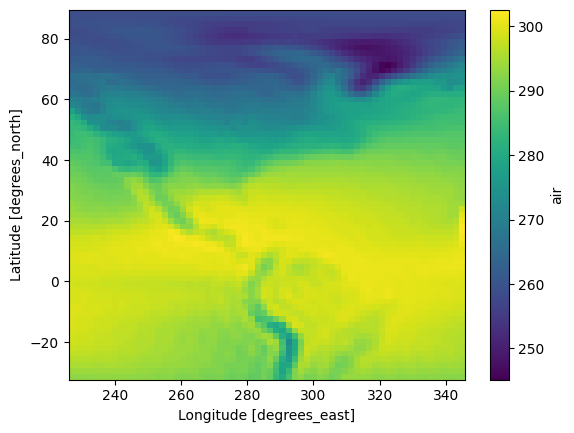

In [9]:
ds.mean(dim='time').air.plot()

In [10]:
ds

<xarray.Dataset> Size: 24MB
Dimensions:    (time: 1461, lat: 64, lon: 64, nbnds: 2)
Coordinates:
  * lat        (lat) float32 256B 88.54 86.65 84.75 ... -27.62 -29.52 -31.43
  * lon        (lon) float32 256B 226.9 228.8 230.6 232.5 ... 341.2 343.1 345.0
  * time       (time) datetime64[ns] 12kB 2021-01-01 2021-01-02 ... 2024-12-31
Dimensions without coordinates: nbnds
Data variables:
    air        (time, lat, lon) float32 24MB dask.array<chunksize=(1, 64, 64), meta=np.ndarray>
    time_bnds  (time, nbnds) float64 23kB dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2017/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [11]:
import numpy as np
ds['obs'] = ds['air'] * np.random.choice([1, np.nan], size=ds['air'].shape, p=[0.01, 0.99])

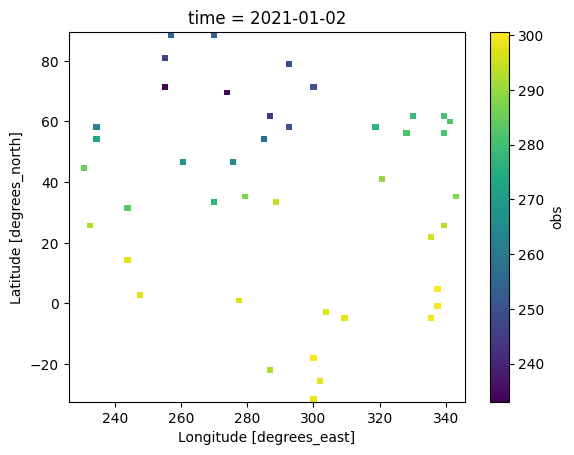

In [12]:
ds.obs.isel(time=1).plot()

In [13]:
%pip install -q diffusers

In [14]:
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from diffusers import HeunDiscreteScheduler, UNet2DModel
from matplotlib import pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda


In [15]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.optim as optim
class ncDataset(Dataset):
    def __init__(self, data):
        self.data = data
    def __getitem__(self, index):
        x = torch.from_numpy(self.data[index]).unsqueeze(0)
        return x

    def __len__(self):
        return len(self.data)

# class ncDataset(Dataset):
#     def __init__(self, data):
#         self.data = data
#     def __getitem__(self, index):
#         x = self.data[index].unsqueeze(0).float()
#         return x
#     def __len__(self):
#         return len(self.data)


In [16]:
data = ds.air.values
data.shape
max, min  = data.max(), data.min()
print(max, min)

313.0 200.325


In [17]:
data_norm = (data - min)/(max - min)
val_norm = (ds_valid.air.values - min)/(max - min)
test_norm = (ds_test.air.values - min)/(max - min)

In [18]:
train_dataset = ncDataset(data_norm)
val_dataset = ncDataset(val_norm)
test_dataset = ncDataset(test_norm)

In [19]:
lr = train_dataset.__getitem__(0)
print(lr.shape, train_dataset.__len__())

torch.Size([1, 64, 64]) 1461


In [20]:
train_dataloader = DataLoader(train_dataset, batch_size=20, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=20, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=20, shuffle=True)

In [21]:
for batch in train_dataloader:
    data = batch
    print(data.size())  # Should print torch.Size([16, 1, 30, 30])
    break

torch.Size([20, 1, 64, 64])


Input shape: torch.Size([20, 1, 64, 64])


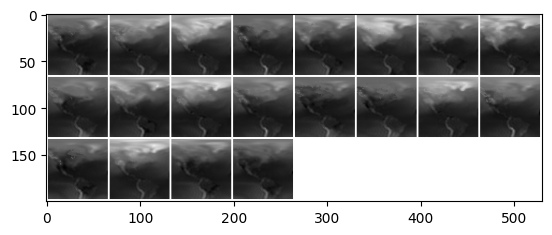

In [22]:
x = next(iter(train_dataloader))
print('Input shape:', x.shape)
plt.imshow(torchvision.utils.make_grid(x)[0], cmap='Greys');

In [23]:
noise_scheduler = HeunDiscreteScheduler(num_train_timesteps=1000)

X shape torch.Size([8, 1, 64, 64])
Noisy X shape torch.Size([8, 1, 64, 64])


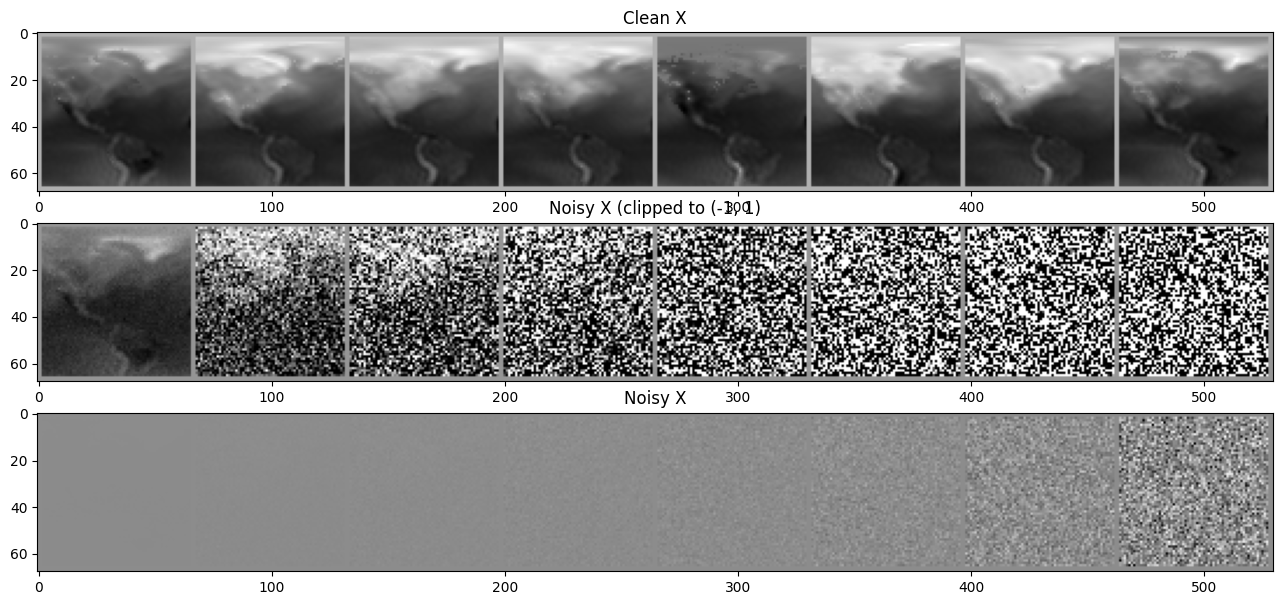

In [24]:
#@markdown visualize the EDM noising process for different timesteps:

# Noise a batch of images to view the effect
fig, axs = plt.subplots(3, 1, figsize=(16, 7))
xb = next(iter(train_dataloader))
xb = xb.to(device)[:8]
xb = xb * 2. - 1. # Map to (-1, 1)
print('X shape', xb.shape)

# Show clean inputs
axs[0].imshow(torchvision.utils.make_grid(xb[:8])[0].detach().cpu(), cmap='Greys')
axs[0].set_title('Clean X')

# Add noise with scheduler
timesteps = torch.linspace(0, 999, 8).long().to(device)
noise = torch.randn_like(xb) # << NB: randn not rand
noisy_xb = noise_scheduler.add_noise(xb, noise, timesteps)
print('Noisy X shape', noisy_xb.shape)

# Show noisy version (with and without clipping)
axs[1].imshow(torchvision.utils.make_grid(noisy_xb[:8])[0].detach().cpu().clip(-1, 1),  cmap='Greys')
axs[1].set_title('Noisy X (clipped to (-1, 1)')
axs[2].imshow(torchvision.utils.make_grid(noisy_xb[:8])[0].detach().cpu(),  cmap='Greys')
axs[2].set_title('Noisy X');

In [25]:
class_emb_size = 1
device = 'cuda'
model = UNet2DModel(
    sample_size=64,  # Target image resolution
    in_channels=1 ,  # Additional input channels for class conditioning
    out_channels=1,  # Number of output channels
    layers_per_block=2,  # Number of ResNet layers per UNet block

    # Ensure block_out_channels matches the number of down_block_types
    block_out_channels=(64, 128, 256, 512),

    down_block_types=(
        "DownBlock2D",  # Regular ResNet downsampling block
        "AttnDownBlock2D",  # Spatial self-attention downsampling block
        "AttnDownBlock2D",
        "DownBlock2D",  # Additional down block
    ),

    up_block_types=(
        "UpBlock2D",
        "AttnUpBlock2D",
        "AttnUpBlock2D",  # More attention layers
        "UpBlock2D",
    ),
).to(device)
print(model)

UNet2DModel(
  (conv_in): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=64, out_features=256, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=256, out_features=256, bias=True)
  )
  (down_blocks): ModuleList(
    (0): DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 64, eps=1e-05, affine=True)
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=256, out_features=64, bias=True)
          (norm2): GroupNorm(32, 64, eps=1e-05, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (conv): Conv2d(64, 64, ker

In [26]:
# How many runs through the data should we do?
n_epochs = 10

class_emb_size = 1
device = 'cuda'
model = UNet2DModel(
    sample_size=64,  # Target image resolution
    in_channels=1 ,  # Additional input channels for class conditioning
    out_channels=1,  # Number of output channels
    layers_per_block=2,  # Number of ResNet layers per UNet block

    # Ensure block_out_channels matches the number of down_block_types
    block_out_channels=(64, 128, 256, 512),

    down_block_types=(
        "DownBlock2D",  # Regular ResNet downsampling block
        "AttnDownBlock2D",  # Spatial self-attention downsampling block
        "AttnDownBlock2D",
        "DownBlock2D",  # Additional down block
    ),

    up_block_types=(
        "UpBlock2D",
        "AttnUpBlock2D",
        "AttnUpBlock2D",  # More attention layers
        "UpBlock2D",
    ),
).to(device)

In [27]:
# Our loss function
loss_fn = nn.MSELoss()

# # The optimizer
# opt = torch.optim.Adam(model.parameters(), lr=1e-3)

# Keeping a record of the losses for later viewing
losses = []

# Optimizer: Use AdamW
opt = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-2)

# Learning rate scheduler
scheduler = optim.lr_scheduler.CosineAnnealingLR(opt, T_max=5000, eta_min=1e-6)


# Early stopping parameters
early_stopping_patience = 5000  # Stop if no improvement after 10 epochs
best_val_loss = float("inf")
patience_counter = 0
print_step = 1


# The training loop
for epoch in range(n_epochs):
    losses = []
    model.train()
    for batch in train_dataloader:
        input = batch
        x = input.to(device)  # Data on the GPU (mapped to (-1, 1))
        noise = torch.randn_like(x)
        timesteps = torch.randint(0, 999, (x.shape[0],)).long().to(device)
        noisy_x = noise_scheduler.add_noise(x, noise, timesteps)
        bs, ch, w, h = x.shape
        net_input = noisy_x #torch.cat((noisy_y, x), 1) # (bs, 2, 28, 28)
        pred = model(net_input, timesteps).sample
        loss = loss_fn(pred, noise) # How close is the output to the noise

        loss.backward()
        opt.step()
        opt.zero_grad()
        scheduler.step()

        # Store the loss for later
        losses.append(loss.item())
        # Print loss every 100 steps

    avg_train_loss = sum(losses)/len(losses)

    model.eval()
    val_losses = []
    with torch.no_grad():
        for batch in val_dataloader:
            input = batch
            x = input.to(device)
            noise = torch.randn_like(x)
            timesteps = torch.randint(0, 999, (x.shape[0],)).long().to(device)
            noisy_x = noise_scheduler.add_noise(x, noise, timesteps)
            net_input = noisy_x #torch.cat((noisy_y, x), 1)
            pred = model(net_input, timesteps).sample
            loss = loss_fn(pred, noise)
            val_losses.append(loss.item())

    avg_val_loss = sum(val_losses) / len(val_losses)


    if epoch % print_step == 0:
            # print(f"Epoch {epoch}, Step {step}, Training Loss: {loss.item():.6f}")
        print(f"Epoch {epoch}: Avg Train Loss: {avg_train_loss:.6f}, Avg Val Loss: {avg_val_loss:.6f}")

    # Checkpoint: Save best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), "best_model.pth")
        print("Saved best model!")
    else:
        patience_counter += 1
        print(f"Early stopping patience: {patience_counter}/{early_stopping_patience}")

    # Early stopping condition
    if patience_counter >= early_stopping_patience:
        print("Early stopping triggered! Training stopped.")
        break

Epoch 0: Avg Train Loss: 0.099943, Avg Val Loss: 0.025412
Saved best model!
Epoch 1: Avg Train Loss: 0.018792, Avg Val Loss: 0.015667
Saved best model!
Epoch 2: Avg Train Loss: 0.012175, Avg Val Loss: 0.010314
Saved best model!
Epoch 3: Avg Train Loss: 0.010305, Avg Val Loss: 0.011540
Early stopping patience: 1/5000
Epoch 4: Avg Train Loss: 0.007840, Avg Val Loss: 0.007006
Saved best model!
Epoch 5: Avg Train Loss: 0.006938, Avg Val Loss: 0.006641
Saved best model!
Epoch 6: Avg Train Loss: 0.006157, Avg Val Loss: 0.005274
Saved best model!
Epoch 7: Avg Train Loss: 0.004859, Avg Val Loss: 0.004690
Saved best model!
Epoch 8: Avg Train Loss: 0.005136, Avg Val Loss: 0.004345
Saved best model!
Epoch 9: Avg Train Loss: 0.004258, Avg Val Loss: 0.003998
Saved best model!


In [28]:
!ls

air.2m.gauss.2019.nc  air.2m.gauss.2022.nc  best_model.pth
air.2m.gauss.2020.nc  air.2m.gauss.2023.nc  drive
air.2m.gauss.2021.nc  air.2m.gauss.2024.nc  sample_data


In [29]:
# from tqdm import tqdm
# model.load_state_dict(torch.load("best_model.pth"))
# model.eval()
# num_inference_steps = 50
# noise_scheduler.set_timesteps(num_inference_steps)

# x_train = ds_test.air.values.astype(np.float32)
# x_train = (x_train - min)/(max - min)

# # x_train_patches = patchify(x_train[:512,:512], patch_size)[:,np.newaxis,:,:]
# # x_train_patches_tensor = torch.from_numpy(x_train_patches).to(device)
# x_train_tensor = torch.from_numpy(x_train).to(device)
# pred_patches = []
# for batch in x_train_tensor:
#     batch = batch.unsqueeze(0)  # Add batch dimension
#     print(batch.shape)
#     noise = torch.randn_like(batch)
#     net_input = noise.unsqueeze(0)
#     print(net_input.shape)
#     for t in tqdm(noise_scheduler.timesteps, desc="Sampling steps"):
#         with torch.no_grad():
#             residual = model(net_input, t).sample
#         pred = noise_scheduler.step(residual, t, pred).prev_sample
#         net_input = pred

#     pred_patches.append(pred.cpu().numpy())

In [30]:
from tqdm import tqdm

model.load_state_dict(torch.load("best_model.pth"))
model.eval()

num_inference_steps = 50  # or 100 if you prefer
# Don't set_timesteps once globally if you loop over multiple samples.
# We'll reset it for EACH sample.

# If you only want to sample (not condition on x_train), you don't need x_train at all.
# But keeping your normalization for completeness:
x_train = ds_test.air.values.astype(np.float32)
x_train = (x_train - min) / (max - min)

x_train_tensor = torch.from_numpy(x_train).to(device)  # e.g., [H, W] or [1, H, W]

pred_patches = []

# If x_train_tensor is a single image [H, W], don't iterate rows by accident:
if x_train_tensor.ndim == 2:         # [H, W]
    samples = [x_train_tensor.unsqueeze(0)]  # list with one [1, H, W]
elif x_train_tensor.ndim == 3:       # [N, H, W]
    samples = [x.unsqueeze(0) for x in x_train_tensor]  # make each [1, H, W]
else:
    samples = [x_train_tensor]        # already batched?

for batch in samples:
    # Ensure shape [B, C, H, W] with C=1
    if batch.ndim == 3:
        batch = batch.unsqueeze(1)    # [1, 1, H, W]

    print(batch.shape)  # e.g., torch.Size([1, 1, 64, 64])

    # Start from noise
    sample = torch.randn_like(batch)  # x_T

    # IMPORTANT: reset scheduler for this sample
    noise_scheduler.set_timesteps(num_inference_steps, device=sample.device)

    for t in tqdm(noise_scheduler.timesteps, desc="Sampling steps"):
        with torch.no_grad():
            # Some models expect a per-batch timestep tensor; expand if needed:
            t_in = t if isinstance(t, torch.Tensor) else torch.tensor(t, device=sample.device)
            t_in = t_in.expand(sample.shape[0])  # [B]

            residual = model(sample, t_in).sample  # predict noise (or v, depending on training)
        out = noise_scheduler.step(residual, t, sample)  # pass *current* sample
        sample = out.prev_sample

    pred_patches.append(sample.cpu().numpy())

torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.13it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.82it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.54it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.42it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 41.32it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 41.79it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.39it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.96it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.45it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.11it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 45.16it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 38.52it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.34it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 51.44it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.53it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.77it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 46.85it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 37.37it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.90it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.21it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.28it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.52it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 47.41it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 37.36it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.35it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.14it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.88it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 51.10it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.83it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 38.89it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 45.04it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.73it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.36it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.78it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.91it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 40.51it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 41.51it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.26it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.78it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.76it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.70it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 41.36it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 41.46it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.01it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.55it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.87it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 51.15it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 42.99it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 39.16it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.60it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.98it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.47it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.86it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 45.74it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 37.84it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.95it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.83it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.08it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.69it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 47.51it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 37.56it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.93it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.57it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.38it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 51.15it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.35it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 36.89it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 47.70it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.78it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.72it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.84it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.74it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 38.26it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 44.10it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.42it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.96it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 51.01it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.90it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 40.39it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 34.62it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 41.64it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.98it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.73it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.36it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 38.76it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 44.17it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.14it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.79it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 51.32it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.17it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 39.81it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 43.43it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 51.14it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.86it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 51.25it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.17it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 42.69it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 41.29it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.36it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.62it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 47.50it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.20it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 43.69it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 39.98it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.51it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.41it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.86it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.23it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 46.07it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 36.83it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.64it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.01it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.32it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.06it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 44.99it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 36.22it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.54it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.94it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.03it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 47.66it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.02it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 36.11it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.58it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.98it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.50it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.28it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.22it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 37.04it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 44.62it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.02it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.09it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.86it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.16it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 38.56it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 43.11it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.81it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.90it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.32it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.51it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 40.92it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 41.95it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.50it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.81it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.05it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.75it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 41.51it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 40.76it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.14it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.04it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.83it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.46it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 44.20it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 38.61it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.94it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.51it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.02it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.33it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 42.77it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 35.82it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.16it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.59it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.27it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 51.59it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 45.29it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 37.87it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.52it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.55it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.45it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.74it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.26it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 37.40it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 46.91it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.41it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.52it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.02it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.98it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 37.36it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 46.51it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.93it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.26it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.02it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.27it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 39.26it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 43.43it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.92it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.21it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.02it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.33it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 40.08it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 40.11it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.37it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.28it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.33it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.10it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 40.31it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 41.02it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 47.22it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 45.48it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.46it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 40.93it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:03<00:00, 32.13it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 40.24it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.75it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.49it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.57it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.83it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 42.80it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 38.52it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.00it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 47.51it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.63it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 47.35it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 41.01it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 39.11it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.87it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.10it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.42it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.59it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 43.90it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 38.11it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.32it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.83it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.37it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.26it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 44.71it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 37.43it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.00it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.08it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.13it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.53it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 42.99it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 36.50it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.71it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 47.42it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.59it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.90it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 44.69it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 37.98it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.91it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.65it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.67it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 46.96it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 45.78it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 36.64it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.88it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.25it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.42it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.94it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 47.21it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 36.11it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.33it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.54it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.37it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.54it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.22it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 36.71it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 46.20it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.47it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.72it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.39it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.32it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 38.93it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 44.75it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.10it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.56it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.19it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.58it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 39.19it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 42.20it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.63it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.63it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.00it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.52it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 40.65it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 40.65it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.95it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.09it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.00it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.90it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 42.90it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 39.08it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.91it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.33it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.08it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 47.37it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 43.00it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 39.05it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.18it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.97it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.81it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.65it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 45.15it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 37.06it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.77it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.47it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.10it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.73it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 44.55it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 36.21it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.98it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.39it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.39it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.73it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 45.83it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 36.79it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.57it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.32it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 47.76it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.32it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 47.52it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 34.47it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.39it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.73it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 47.37it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.75it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 47.36it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 35.32it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.83it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 39.72it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 39.81it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.46it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 42.41it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 38.87it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.08it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.54it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.60it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.23it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 43.22it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 38.75it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.91it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.70it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.06it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.15it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 45.29it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 37.43it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.48it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.50it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.41it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.43it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 43.79it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 35.68it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.45it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.58it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.40it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.88it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 47.15it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 36.43it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.95it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.38it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.06it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.83it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.40it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 36.77it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 46.42it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 49.22it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.72it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 48.78it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.29it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 37.32it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 45.19it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.34it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.94it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 50.52it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:01<00:00, 49.90it/s]


torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 38.58it/s]


In [31]:
predicted_sr_np = (np.concatenate(pred_patches, axis=0))* (max - min) + min
predicted_sr_np[predicted_sr_np < 0] = 0.0  # Ensure non-negative values

In [32]:
predicted_sr_np.shape

(365, 1, 64, 64)

In [33]:
ds_test['predicted'] = (('time', 'lat', 'lon'), predicted_sr_np[:,0,:,:])

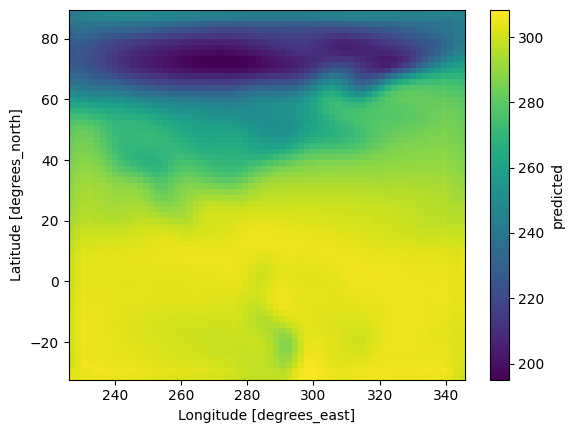

In [34]:
ds_test.predicted.mean(dim='time').plot()

In [35]:
(60)/(max-min)

np.float32(0.532505)

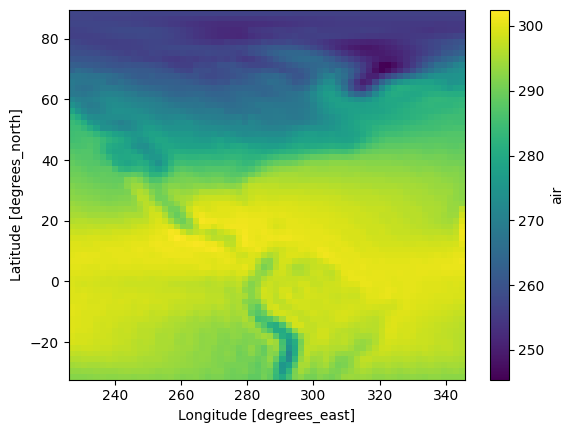

In [36]:
ds_test.air.mean(dim='time').plot()

# Manshausen Zero-Shot DA

In [37]:
from tqdm import tqdm

model.load_state_dict(torch.load("best_model.pth"))
model.eval()

UNet2DModel(
  (conv_in): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=64, out_features=256, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=256, out_features=256, bias=True)
  )
  (down_blocks): ModuleList(
    (0): DownBlock2D(
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 64, eps=1e-05, affine=True)
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (time_emb_proj): Linear(in_features=256, out_features=64, bias=True)
          (norm2): GroupNorm(32, 64, eps=1e-05, affine=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (nonlinearity): SiLU()
        )
      )
      (downsamplers): ModuleList(
        (0): Downsample2D(
          (conv): Conv2d(64, 64, ker

In [38]:
import numpy as np
ds_test['obs'] = ds_test['air'] * np.random.choice([1, np.nan], size=ds_test['air'].shape, p=[0.01, 0.99])

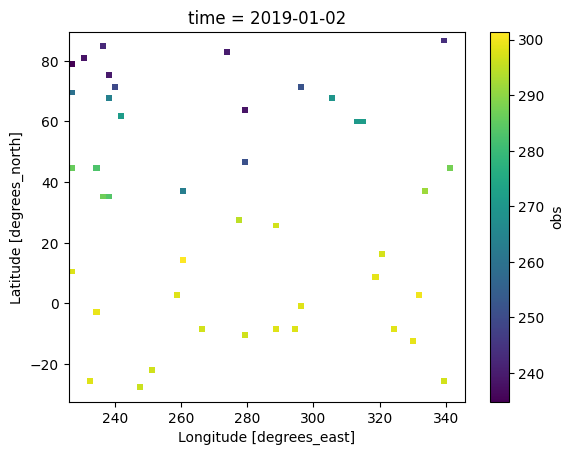

In [39]:
ds_test.obs.isel(time=1).plot()

In [40]:
ds_test.obs.isel(time=1)

<xarray.DataArray 'obs' (lat: 64, lon: 64)> Size: 33kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 256B 88.54 86.65 84.75 82.85 ... -27.62 -29.52 -31.43
  * lon      (lon) float32 256B 226.9 228.8 230.6 232.5 ... 341.2 343.1 345.0
    time     datetime64[ns] 8B 2019-01-02

In [41]:
from tqdm import tqdm

model.load_state_dict(torch.load("best_model.pth"))
model.eval()

num_inference_steps = 50  # or 100 if you prefer
# Don't set_timesteps once globally if you loop over multiple samples.
# We'll reset it for EACH sample.

# If you only want to sample (not condition on x_train), you don't need x_train at all.
# But keeping your normalization for completeness:
x_train = ds_test.air.values.astype(np.float32)
x_train = (x_train - min) / (max - min)

x_train_tensor = torch.from_numpy(x_train).to(device)  # e.g., [H, W] or [1, H, W]

pred_patches = []

# If x_train_tensor is a single image [H, W], don't iterate rows by accident:
if x_train_tensor.ndim == 2:         # [H, W]
    samples = [x_train_tensor.unsqueeze(0)]  # list with one [1, H, W]
elif x_train_tensor.ndim == 3:       # [N, H, W]
    samples = [x.unsqueeze(0) for x in x_train_tensor]  # make each [1, H, W]
else:
    samples = [x_train_tensor]        # already batched?

In [36]:
len(samples[:1])

1

In [46]:
ds_test.isel(time=0).obs.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [56]:
gt = torch.from_numpy((ds_test.isel(time=0).obs.values - min)/(max-min)).unsqueeze(0).unsqueeze(0).cuda()
gt.shape

torch.Size([1, 1, 64, 64])

In [58]:
observation_noise = np.nanstd(gt.cpu().numpy())
observation_noise
# should be uncertainty of measurement - how much to trust the data point or denoiser
# Try 0.1

np.float64(0.17502309646975292)

In [102]:
gt = torch.from_numpy((ds_test.isel(time=0).obs.values - min)/(max-min)).unsqueeze(0).unsqueeze(0).cuda()
observation_noise = np.nanstd(gt.cpu().numpy())
pred_patches = []
for batch in samples[:1]:
    # Ensure shape [B, C, H, W] with C=1
    if batch.ndim == 3:
        batch = batch.unsqueeze(1)    # [1, 1, H, W]

    print(batch.shape)  # e.g., torch.Size([1, 1, 64, 64])

    # Start from noise
    sample = torch.randn_like(batch)  # x_T

    # IMPORTANT: reset scheduler for this sample
    noise_scheduler.set_timesteps(num_inference_steps, device=sample.device)

    for t in tqdm(noise_scheduler.timesteps, desc="Sampling steps"):
        with torch.no_grad():
            # Some models expect a per-batch timestep tensor; expand if needed:
            t_in = t if isinstance(t, torch.Tensor) else torch.tensor(t, device=sample.device)
            t_in = t_in.expand(sample.shape[0])  # [B]

            residual = model(sample, t_in).sample  # predict noise (or v, depending on training)
        out = noise_scheduler.step(residual, t, sample)  # pass *current* sample
        sample = out.prev_sample
        diff = gt - sample
        likelihood_score = (-diff / observation_noise).float()
        # # Create a mask for valid values in tensor_a (where tensor_a is not NaN)
        valid_mask = ~torch.isnan(likelihood_score)
        test_sample = sample
        test_sample[valid_mask] = test_sample[valid_mask] - likelihood_score[valid_mask]
        # # Perform subtraction only where valid
        # sample = torch.where(valid_mask, sample + likelihood_score, sample).float()


    pred_patches.append(sample.cpu().numpy())

ds_test['pred_da'] = (('lat', 'lon'), pred_patches[0][0,0,:,:]* (max - min) + min)

torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 39.76it/s]


In [62]:
np.nansum(likelihood_score.cpu().numpy())

np.float64(-24.233082236107784)

In [41]:
sample.shape

torch.Size([1, 1, 64, 64])

In [52]:
# def compute_likelihood_score(noisy_state, observations, observation_operator, observation_noise):

# # Step 1: Use the observation operator to map the noisy state to the predicted observations
# predicted_observations = observation_operator(noisy_state)

# # Step 2: Calculate the difference between the predicted observations and the actual observations
# observation_diff = predicted_observations - observations

# # Step 3: Compute the log likelihood based on the Gaussian likelihood function
# # The likelihood is assumed to be Gaussian with variance (observation_noise)
# log_likelihood = -0.5 * torch.sum((observation_diff ** 2) / observation_noise)

# # Step 4: Compute the gradient of the log likelihood with respect to the noisy state (score)
# likelihood_score = -observation_diff / observation_noise

# # Return both the log likelihood and the score (gradient of log likelihood)
# return log_likelihood, likelihood_score

In [53]:
# log_likelihood, likelihood_score = compute_likelihood_score(noisy_state, observations, observation_operator, observation_noise)
# noisy_state = noisy_state - learning_rate * likelihood_score

In [70]:
len(pred_patches)

1

In [81]:
ds_test['pred_da'] = (('lat', 'lon'), pred_patches[0][0,0,:,:])

In [93]:
diff.shape

torch.Size([1, 1, 64, 64])

In [105]:
ds_test['diff'] = (('lat', 'lon'), diff.cpu().numpy()[0,0])
ds_test['likelihood_score'] = (('lat', 'lon'), likelihood_score.cpu().numpy()[0,0])
ds_test['test_sample'] = (('lat', 'lon'), test_sample.cpu().numpy()[0,0])
ds_test['sample'] = (('lat', 'lon'), sample.cpu().numpy()[0,0])

In [82]:
pred_patches[0].shape

(1, 1, 64, 64)

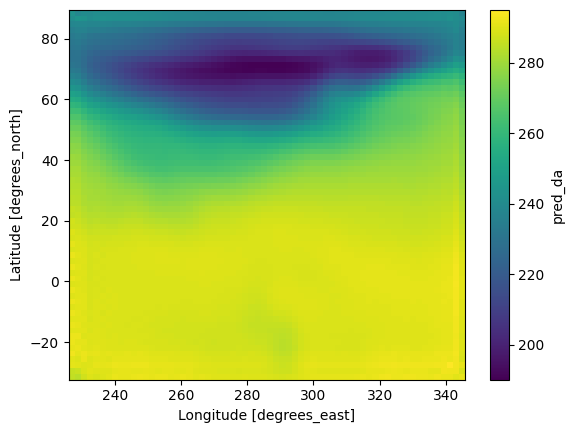

In [90]:
ds_test.pred_da.plot()

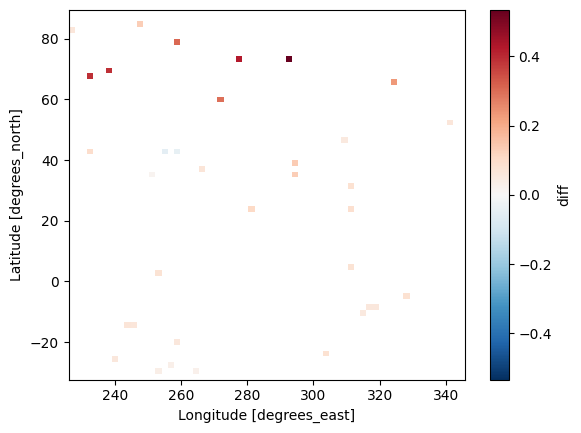

In [95]:
ds_test['diff'].plot()

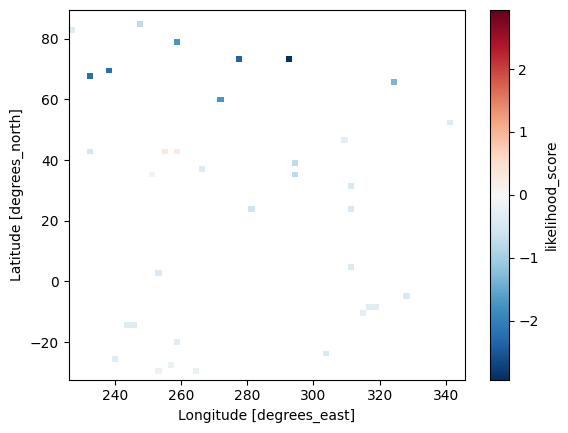

In [98]:
ds_test['likelihood_score'].plot()

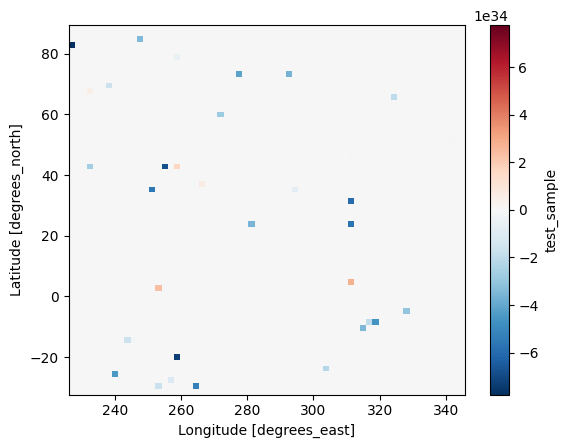

In [104]:
ds_test['test_sample'].plot()

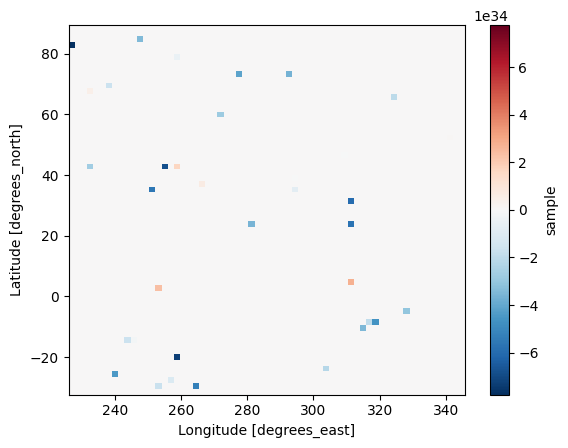

In [106]:
ds_test['sample'].plot()

In [85]:
import torch
import numpy as np
from tqdm import tqdm

# Example ground truth `gt` containing NaN values
gt = torch.from_numpy((ds_test.isel(time=0).obs.values - min) / (max - min)).unsqueeze(0).unsqueeze(0).cuda()

# Standard deviation of the observation noise
observation_noise = np.nanstd(gt.cpu().numpy())
if observation_noise == 0:
    print("Warning: observation_noise is zero, setting it to a small value.")
    observation_noise = 1e-6  # Avoid division by zero

# Check initial difference between gt and sample
print(f"Initial difference (gt - sample): {torch.abs(gt - sample).mean().item()}")

pred_patches = []
for batch in samples[:1]:
    # Ensure shape [B, C, H, W] with C=1
    if batch.ndim == 3:
        batch = batch.unsqueeze(1)  # [1, 1, H, W]

    print(f"Batch shape: {batch.shape}")  # e.g., torch.Size([1, 1, 64, 64])

    # Start from noise
    sample = torch.randn_like(batch)  # x_T

    # IMPORTANT: reset scheduler for this sample
    noise_scheduler.set_timesteps(num_inference_steps, device=sample.device)

    for t in tqdm(noise_scheduler.timesteps, desc="Sampling steps"):
        with torch.no_grad():
            # Some models expect a per-batch timestep tensor; expand if needed:
            t_in = t if isinstance(t, torch.Tensor) else torch.tensor(t, device=sample.device)
            t_in = t_in.expand(sample.shape[0])  # [B]

            # Predict noise (or v, depending on training)
            residual = model(sample, t_in).sample
            print(f"Residual (first 5 values): {residual.flatten()[:5]}")  # Debugging residual

        # Step the noise scheduler
        out = noise_scheduler.step(residual, t, sample)  # pass *current* sample
        sample = out.prev_sample

        # Create a mask for valid (non-NaN) values in `gt`
        valid_gt_mask = ~torch.isnan(gt)

        # Compute the difference only for valid values
        diff = (gt - sample) * valid_gt_mask  # Zero out the invalid areas

        # Compute the likelihood score only for valid areas
        likelihood_score = -diff / observation_noise

        # Ensure likelihood_score is zero where `gt` is NaN
        likelihood_score = torch.where(valid_gt_mask, likelihood_score, torch.tensor(0.0, device=likelihood_score.device))

        # Create a mask for valid likelihood scores (non-NaN)
        valid_mask = ~torch.isnan(likelihood_score)

        # Perform update only on valid areas (where likelihood score is not NaN)
        sample = torch.where(valid_mask, sample + likelihood_score, sample).float()

        # Optionally, check the mask and likelihood score
        print(f"Valid mask (non-NaN): {valid_mask.sum()}")  # Count of valid positions
        print(f"Likelihood score range: {likelihood_score.min().item()} to {likelihood_score.max().item()}")  # Range of likelihood scores

    # Append the final sample to the list of predicted patches
    pred_patches.append(sample.cpu().numpy())

# Check for NaNs in pred_patches
print(f"NaNs in pred_patches: {np.isnan(pred_patches[0]).sum()}")  # Ensure no NaNs in the prediction patch

# Store the result in ds_test['pred_da']
ds_test['pred_da'] = (('lat', 'lon'), pred_patches[0][0, 0, :, :])


Initial difference (gt - sample): nan
Batch shape: torch.Size([1, 1, 64, 64])


Sampling steps:   1%|          | 1/99 [00:00<00:12,  7.96it/s]

Residual (first 5 values): tensor([-0.6312, -0.0444,  0.8231, -0.8665,  0.3799], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -17.825313676203102 to 15.44670834142373
Residual (first 5 values): tensor([ 0.4649,  0.0570, -0.8653,  0.9423, -0.3477], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -81.13563587604703 to 81.73055156170473


Sampling steps:   3%|▎         | 3/99 [00:00<00:06, 13.96it/s]

Residual (first 5 values): tensor([-0.0699, -0.0574,  0.1573, -0.2603,  0.0457], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -262.5365003987142 to 266.3179843522091
Residual (first 5 values): tensor([ 0.0231,  0.0096,  0.0367, -0.0112,  0.0284], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -251.67851483723177 to 256.486845166436


Sampling steps:   5%|▌         | 5/99 [00:00<00:06, 14.84it/s]

Residual (first 5 values): tensor([ 0.0166,  0.0044,  0.0464, -0.0326,  0.0295], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -1428.838936227753 to 1461.480964896433
Residual (first 5 values): tensor([0.0191, 0.0192, 0.0195, 0.0087, 0.0189], device='cuda:0')


Sampling steps:   7%|▋         | 7/99 [00:00<00:07, 12.68it/s]

Valid mask (non-NaN): 4096
Likelihood score range: -1429.7323729996224 to 1463.9832504376304
Residual (first 5 values): tensor([0.0190, 0.0191, 0.0198, 0.0083, 0.0190], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -9372.706800562897 to 9605.53847269016


Sampling steps:   9%|▉         | 9/99 [00:00<00:08, 10.71it/s]

Residual (first 5 values): tensor([0.0176, 0.0178, 0.0136, 0.0108, 0.0143], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -9373.984533713612 to 9607.442518269552
Residual (first 5 values): tensor([0.0176, 0.0178, 0.0136, 0.0108, 0.0144], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -62737.234629939245 to 64308.17234415164
Residual (first 5 values): tensor([0.0177, 0.0177, 0.0129, 0.0114, 0.0139], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -62737.43549628608 to 64308.46806405115


Sampling steps:  13%|█▎        | 13/99 [00:01<00:07, 12.26it/s]

Residual (first 5 values): tensor([0.0177, 0.0177, 0.0129, 0.0114, 0.0139], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -421018.91630944534 to 431569.43898887176
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -421018.9609464113 to 431569.4836258377
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -2826374.136514654 to 2897208.3993850406


Sampling steps:  15%|█▌        | 15/99 [00:01<00:06, 12.38it/s]

Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -2826374.136514654 to 2897208.3993850406
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -18974820.545920074 to 19450370.858721856
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -18974820.545920074 to 19450370.858721856


Sampling steps:  19%|█▉        | 19/99 [00:01<00:06, 13.18it/s]

Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -127387946.48601095 to 130580568.20019881
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -127387946.48601095 to 130580568.20019881
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -855222904.096962 to 876656684.0605226


Sampling steps:  26%|██▋       | 26/99 [00:01<00:03, 20.69it/s]

Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -855222904.096962 to 876656684.0605226
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -5741566165.357899 to 5885462319.901286
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -5741566165.357899 to 5885462319.901286
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -38546186742.91833 to 39512238343.81372
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -38546186742.91833 to 39512238343.81372
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], devic

Sampling steps:  34%|███▍      | 34/99 [00:01<00:02, 27.79it/s]

Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -1737334726433.6409 to 1780876153869.5066
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -1737334726433.6409 to 1780876153869.5066
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -11663651428276.715 to 11955968569811.12
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -11663651428276.715 to 11955968569811.12
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -78304295620968.66 to 80266773154040.39
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138]

Sampling steps:  42%|████▏     | 42/99 [00:02<00:01, 32.45it/s]

Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -3529292487087952.5 to 3617744484691834.0
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -3529292487087952.5 to 3617744484691834.0
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -2.369401746163459e+16 to 2.428784256464033e+16
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -2.369401746163459e+16 to 2.428784256464033e+16
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -1.5907053386847747e+17 to 1.6305719764884944e+17
Residual (first 5 values): tensor([0.0178, 0.0177,

Sampling steps:  46%|████▋     | 46/99 [00:02<00:01, 32.40it/s]

Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -7.169548688631486e+18 to 7.349233081187365e+18
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -7.169548688631486e+18 to 7.349233081187365e+18
Residual (first 5 values): tensor([0.0178, 0.0177, 0.0128, 0.0115, 0.0138], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -4.8132993268737884e+19 to 4.933930931974182e+19
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -4.8132993268737884e+19 to 4.933930931974182e+19
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -3.23142371148206e+20 to 3.312410211932598e+20
Residual (first 5 values): tensor([0.01

Sampling steps:  55%|█████▍    | 54/99 [00:02<00:01, 32.17it/s]

Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -2.1694265435797528e+21 to 2.223797116404571e+21
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -1.4564513979015765e+22 to 1.4929532415025638e+22
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -1.4564513979015765e+22 to 1.4929532415025638e+22
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -9.777932540673906e+22 to 1.0022988663416185e+23
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -9.777932540673906e+22 to 1.0022988663416185e+23
Residual (first 5 values): tensor

Sampling steps:  63%|██████▎   | 62/99 [00:02<00:01, 31.25it/s]

Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -4.407061562591797e+24 to 4.5175121005243945e+24
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -4.407061562591797e+24 to 4.5175121005243945e+24
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -2.9586948810296198e+25 to 3.0328459468532437e+25
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -2.9586948810296198e+25 to 3.0328459468532437e+25
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -1.9863291152297456e+26 to 2.036110702606763e+26
Residual (first 5 values): tensor

Sampling steps:  72%|███████▏  | 71/99 [00:03<00:00, 33.69it/s]

Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -1.333528341137701e+27 to 1.3669493250936107e+27
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -8.952685007857454e+27 to 9.177057190843116e+27
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -8.952685007857454e+27 to 9.177057190843116e+27
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -6.010413633250054e+28 to 6.161046688261997e+28
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -6.010413633250054e+28 to 6.161046688261997e+28
Residual (first 5 values): tensor([0.01

Sampling steps:  82%|████████▏ | 81/99 [00:03<00:00, 40.50it/s]

Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -2.708983825249384e+30 to 2.776876558112608e+30
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -1.8186848891436978e+31 to 1.8642648756073024e+31
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -1.8186848891436978e+31 to 1.8642648756073024e+31
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -1.2209797995560556e+32 to 1.2515800980056142e+32
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -1.2209797995560556e+32 to 1.2515800980056142e+32
Residual (first 5 values): tenso

Sampling steps:  87%|████████▋ | 86/99 [00:03<00:00, 40.65it/s]

Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -3.694550485445602e+34 to 3.7871436076001257e+34
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -2.4803482901260333e+35 to 2.54251070802353e+35
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -2.4803482901260333e+35 to 2.54251070802353e+35
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -1.6651897067945805e+36 to 1.7069226135530776e+36
Residual (first 5 values): tensor([0.0173, 0.0171, 0.0171, 0.0171, 0.0171], device='cuda:0')
Valid mask (non-NaN): 4096
Likelihood score range: -1.6651897067945805e+36 to 1.7069226135530776e+36
Residual (first 5 values): tensor([

Sampling steps: 100%|██████████| 99/99 [00:03<00:00, 26.79it/s]

Residual (first 5 values): tensor([nan, nan, nan, nan, nan], device='cuda:0')
Valid mask (non-NaN): 4061
Likelihood score range: nan to nan
Residual (first 5 values): tensor([nan, nan, nan, nan, nan], device='cuda:0')
Valid mask (non-NaN): 4061
Likelihood score range: nan to nan
Residual (first 5 values): tensor([nan, nan, nan, nan, nan], device='cuda:0')
Valid mask (non-NaN): 4061
Likelihood score range: nan to nan
Residual (first 5 values): tensor([nan, nan, nan, nan, nan], device='cuda:0')
Valid mask (non-NaN): 4061
Likelihood score range: nan to nan
Residual (first 5 values): tensor([nan, nan, nan, nan, nan], device='cuda:0')
Valid mask (non-NaN): 4061
Likelihood score range: nan to nan
Residual (first 5 values): tensor([nan, nan, nan, nan, nan], device='cuda:0')
Valid mask (non-NaN): 4061
Likelihood score range: nan to nan
Residual (first 5 values): tensor([nan, nan, nan, nan, nan], device='cuda:0')
Valid mask (non-NaN): 4061
Likelihood score range: nan to nan
Residual (first 5 va

In [107]:
def observation_operator(x, obs_mask):
    # Apply the observation mask to select observed locations
    return x * obs_mask

In [120]:
def likelihood_gradient(residual, x_test, obs_mask, R, sigma_tau, mu_tau, Gamma):
    # Ensure all inputs are at least 2D
    print("Inside likelihood_gradient:")
    print("residual shape:", residual.shape)
    print("x_test shape:", x_test.shape)
    print("obs_mask shape:", obs_mask.shape)

    # Observation operator (make sure it's consistent in shape)
    H_x_hat = observation_operator(residual, obs_mask)  # This should be consistent in shape

    # Ensure the variance matrix V is correct
    V = R + (sigma_tau**2) * (mu_tau**2) * Gamma
    print("V shape:", V.shape)

    # Calculate likelihood gradient
    try:
        gradient_likelihood = -np.linalg.inv(V) @ (x_test - H_x_hat)
    except Exception as e:
        print("Error during matrix inversion or multiplication:", e)
        raise

    return gradient_likelihood

In [109]:
ds_test['obs']

<xarray.DataArray 'obs' (time: 365, lat: 64, lon: 64)> Size: 12MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lat      (lat) float32 256B 88.54 86.65 84.75 82.85 ... -27.62 -29.52 -31.43
  * lon      (lon) float32 256B 226.9 228.8 230.6 232.5 ... 341.2 343.1 345.0
  * time     (time) datetime64[ns] 3kB 2019-01-01 2019-01-02 ... 2019-12-31

In [121]:
# Guided sampling loop
for t in tqdm(noise_scheduler.timesteps, desc="Guided Sampling steps"):
    with torch.no_grad():
        # Get prior (denoised prediction)
        residual = model(sample, t).sample

        # Convert to NumPy for likelihood gradient calculation
        residual_cpu = residual.cpu().numpy()  # Convert prior residual to NumPy
        x_test_tensor_cpu = x_test_tensor.cpu().numpy()  # Convert x_test_tensor to NumPy

        # Expand the observation mask to match the shape (1, 1, 64, 64)
        obs_mask_expanded = np.expand_dims(np.expand_dims(obs_mask_cpu, axis=0), axis=0)  # Shape: (1, 1, 64, 64)

        # Print shapes for debugging
        print("residual shape:", residual_cpu.shape)
        print("x_test_tensor shape:", x_test_tensor_cpu.shape)
        print("obs_mask_expanded shape:", obs_mask_expanded.shape)

        # Apply the likelihood gradient (guidance)
        likelihood_grad = likelihood_gradient(residual_cpu, x_test_tensor_cpu, obs_mask_expanded, R=1, sigma_tau=1, mu_tau=1, Gamma=1)

        # Combine prior and likelihood gradients
        grad_combined = residual + torch.tensor(likelihood_grad).to(device)  # Convert the NumPy result back to a tensor

        # Update sample using Langevin Monte Carlo step
        out = noise_scheduler.step(grad_combined, t, sample)
        sample = out.prev_sample

# After the guided sampling, 'sample' will be the denoised, guided result
guided_sample = sample.cpu().numpy()

# Revert the normalization (denormalize)
guided_sample_denormalized = guided_sample * (max - min) + min

# Store the prediction
ds_test['predicted'] = (('time', 'lat', 'lon'), guided_sample_denormalized[:, 0, :, :])

# Plot the predictions
ds_test.predicted.mean(dim='time').plot()

Guided Sampling steps:   0%|          | 0/99 [00:00<?, ?it/s]

residual shape: (1, 1, 64, 64)
x_test_tensor shape: (1, 1, 64, 64)
obs_mask_expanded shape: (1, 1, 64, 64)
Inside likelihood_gradient:
residual shape: (1, 1, 64, 64)
x_test shape: (1, 1, 64, 64)
obs_mask shape: (1, 1, 64, 64)


AttributeError: 'int' object has no attribute 'shape'

# Correct code

In [69]:
import math
import torch
import torch.nn as nn
from typing import Callable, Union

from torch import Size, Tensor
from tqdm import tqdm
std = 0.1 # maybe check this = 0.5 60/ (max-min)
R = std**2
eta = 1e-3
gamma = 0.01
# alpha = lambda t: torch.cos(math.acos(math.sqrt(eta)) * t) ** 2

# def alpha(t: Tensor) -> Tensor:
#         return lambda t: torch.cos(math.acos(math.sqrt(eta)) * t) ** 2


def alpha(t: Tensor) -> Tensor:
    # t should be a float tensor on any device (CPU/CUDA)
    const = math.acos(math.sqrt(eta))  # plain Python float is fine
    return torch.cos(const * t) ** 2

def mu(t: Tensor) -> Tensor:
        return alpha(t)

# def sigma(self, t: Tensor) -> Tensor:
#     return (
#         1 - alpha(t) ** 2 + eta**2
#     ).sqrt()  # i.e. mu = sqrt(1 - sigma**2)

def sigma(t: Tensor) -> Tensor:
    return (1 - alpha(t) ** 2 + eta**2).sqrt()

# t = torch.tensor(999., device="cuda:0")
# print(sigma(t))

# # eps - output from denoiser prev_sample in diffusers
# def corrected_noise(x: Tensor, pred: Tensor, obs: Tensor, t: Tensor) -> Tensor:
#     mu_, sigma_ = mu(t), sigma(t)

#     with torch.enable_grad():
#         x = x.detach().requires_grad_(True)

#         err = pred - obs #prev_sample
#         var = std**2 + gamma * (sigma_ / mu_) ** 2

#         log_p = -(err**2 / var).sum() / 2

#     (s,) = torch.autograd.grad(log_p, x)

#     return x - sigma * s

In [77]:
# # --- correction step ---
# def corrected_noise(x: torch.Tensor, obs: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
#     """
#     x: current sample tensor [B, C, H, W]
#     obs: observation tensor broadcastable to x (ideally same shape)
#     t: current timestep (tensor or scalar)
#     """
#     mu_, sigma_ = mu(t), sigma(t)

#     # Ensure obs is a tensor on the same device/dtype and shape-compatible
#     obs = obs.to(x.device, dtype=x.dtype)
#     if obs.ndim == 2:
#         obs = obs.unsqueeze(0).unsqueeze(0)  # [1,1,H,W]
#     elif obs.ndim == 3:
#         obs = obs.unsqueeze(1)               # [B,1,H,W] if B matches

#     with torch.enable_grad():
#         x = x.detach().requires_grad_(True)

#         # Likelihood term: encourage x ~ obs with variance 'var'
#         var = std**2 + gamma * (sigma_ / mu_) ** 2
#         err = x - obs
#         log_p = -(err**2 / var).sum() / 2

#         (s,) = torch.autograd.grad(log_p, x)  # s = ∇_x log p(obs | x)

#     # Small step in the direction of higher likelihood (sign is important)
#     return x - sigma_ * s   # since s = d log_p / dx = -(x-obs)/var, this becomes x + sigma_*(x-obs)/va

In [95]:
import torch

def corrected_noise(x: torch.Tensor, obs: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
    """
    x:  current sample tensor [B, C, H, W]
    obs: observation tensor broadcastable to x (can be [H,W], [1,1,H,W], etc.)
         NaNs in obs are treated as "no observation" and are ignored.
    t:  current timestep (tensor or scalar)
    """
    mu_,   = mu(t),          # assumed provided by caller
    sigma_ = sigma(t)
    eps = 1e-8               # numerical floor for variance / counts

    # Ensure obs is on the same device/dtype and broadcastable
    obs = obs.to(x.device, dtype=x.dtype)
    if obs.ndim == 2:           # [H, W] -> [1,1,H,W] (broadcast over batch & channels)
        obs = obs.unsqueeze(0).unsqueeze(0)
    elif obs.ndim == 3:         # [B, H, W] -> [B,1,H,W] (broadcast over channels)
        obs = obs.unsqueeze(1)

    # Build a mask of valid (non-NaN) observation pixels, broadcast to x's shape
    valid_mask = torch.isfinite(obs)  # True where not NaN/Inf
    # If obs had no NaNs but possible Infs, this also guards them.
    # Expand (logical) mask to x's shape for channel-wise broadcasting
    while valid_mask.ndim < x.ndim:
        valid_mask = valid_mask.unsqueeze(1)  # add channel dim if needed
    valid_mask = valid_mask.expand_as(x)

    # Replace NaNs/Infs in obs with x (so err=0 on invalid spots after masking)
    safe_obs = torch.where(valid_mask, obs.expand_as(x), x)

    with torch.enable_grad():
        x = x.detach().requires_grad_(True)

        # err and variance; only valid entries will contribute via the mask
        err = x - safe_obs

        # variance term (broadcastable); clamp for stability
        # Assumes std and gamma are scalars or broadcastable tensors provided by caller
        var = (std ** 2) + gamma * (sigma_ / (mu_ + eps)) ** 2
        var = torch.as_tensor(var, device=x.device, dtype=x.dtype)
        var = torch.clamp(var, min=eps)

        # Compute masked negative quadratic term. Normalize by #valid to keep scale stable.
        valid_count = valid_mask.sum().to(x.dtype).clamp_min(1.0)
        quad = (err * err) / var  # broadcasted
        # Convert mask to same dtype for multiplication
        log_p = -(quad * valid_mask.to(x.dtype)).sum() / (2.0 * valid_count)

        # s = ∇_x log p(obs | x); for Gaussian this is s = -(x - obs)/var on valid pixels, 0 elsewhere
        (s,) = torch.autograd.grad(log_p, x, create_graph=False, retain_graph=False)

    # Small step in the direction of higher likelihood
    # Since s = -(x-obs)/var (masked), this equals x + sigma_ * (x-obs)/var on valid pixels.
    update = torch.as_tensor(sigma_, device=x.device, dtype=x.dtype) * s
    x_new = x - update

    # Explicitly put NaNs back where obs was invalid
    # x_new = torch.where(valid_mask, x_new, torch.full_like(x_new, float('nan')))
    #  # Keep x unchanged where obs was NaN
    x_new = torch.where(valid_mask, x_new, x)


    return x_new
    # return x - update

In [96]:
ds_test['obs'] = ds_test['air'] * np.random.choice([1, np.nan], size=ds_test['air'].shape, p=[0.01, 0.99])

In [110]:
from tqdm import tqdm

model.load_state_dict(torch.load("best_model.pth"))
model.eval()

num_inference_steps = 50  # or 100 if you prefer
# Don't set_timesteps once globally if you loop over multiple samples.
# We'll reset it for EACH sample.

# If you only want to sample (not condition on x_train), you don't need x_train at all.
# But keeping your normalization for completeness:
x_train = ds_test.air.values.astype(np.float32)
x_train = (x_train - min) / (max - min)

x_train_tensor = torch.from_numpy(x_train).to(device)  # e.g., [H, W] or [1, H, W]

pred_patches = []

# If x_train_tensor is a single image [H, W], don't iterate rows by accident:
if x_train_tensor.ndim == 2:         # [H, W]
    samples = [x_train_tensor.unsqueeze(0)]  # list with one [1, H, W]
elif x_train_tensor.ndim == 3:       # [N, H, W]
    samples = [x.unsqueeze(0) for x in x_train_tensor]  # make each [1, H, W]
else:
    samples = [x_train_tensor]        # already batched?

for batch in samples[:1]:
    # Ensure shape [B, C, H, W] with C=1
    if batch.ndim == 3:
        batch = batch.unsqueeze(1)    # [1, 1, H, W]

    print(batch.shape)  # e.g., torch.Size([1, 1, 64, 64])

    # Start from noise
    sample = torch.randn_like(batch)  # x_T

    # IMPORTANT: reset scheduler for this sample
    noise_scheduler.set_timesteps(num_inference_steps, device=sample.device)

    for t in tqdm(noise_scheduler.timesteps, desc="Sampling steps"):
        with torch.no_grad():
            # Some models expect a per-batch timestep tensor; expand if needed:
            t_in = t if isinstance(t, torch.Tensor) else torch.tensor(t, device=sample.device)
            t_in = t_in.expand(sample.shape[0])  # [B]

            residual = model(sample, t_in).sample  # predict noise (or v, depending on training)
        out = noise_scheduler.step(residual, t, sample)  # pass *current*
        sample = out.prev_sample
        mu_, alpha_, sigma_ = mu(t), alpha(t), sigma(t)
        obs = torch.from_numpy(ds_test.obs.isel(time=0).values).unsqueeze(0).unsqueeze(0).cuda()
        obs = (obs - min) / (max - min)
        sample = corrected_noise(sample, obs, t)

    pred_patches.append(sample.cpu().detach().numpy())

torch.Size([1, 1, 64, 64])


Sampling steps: 100%|██████████| 99/99 [00:02<00:00, 37.45it/s]


In [106]:
ds_test['pred_da'] = (('lat', 'lon'), pred_patches[0][0,0,:,:]* (max - min) + min)

In [107]:
#ds_test['pred_da'] = (('lat', 'lon'), pred_patches[0][0,0,:,:])

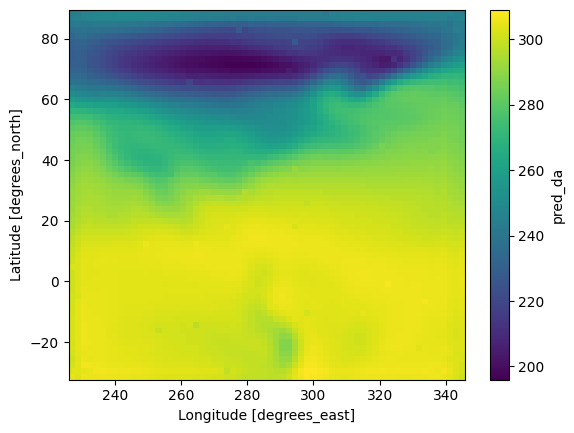

In [108]:
ds_test.pred_da.plot()

In [102]:
np.sum(np.isnan(sample.cpu().detach().numpy()))

np.int64(0)

In [1]:
!pwd

/content
